In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
dataset= pd.read_csv("world_data.csv")
dataset.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [5]:
dataset.shape

(194, 17)

In [6]:
dataset.dtypes

country             object
happiness          float64
income             float64
lifeexp            float64
sanitation         float64
water              float64
urbanpopulation    float64
unemployment       float64
literacy           float64
inequality         float64
murder             float64
energy             float64
childmortality     float64
fertility          float64
hiv                float64
foodsupply         float64
population           int64
dtype: object

In [9]:
dataset.isnull().sum().sort_values()

country              0
water                0
sanitation           0
population           0
income               1
childmortality       1
lifeexp              7
fertility           10
energy              25
foodsupply          26
inequality          34
hiv                 45
literacy            45
happiness           54
urbanpopulation     75
unemployment        82
murder             101
dtype: int64

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         194 non-null    object 
 1   happiness       140 non-null    float64
 2   income          193 non-null    float64
 3   lifeexp         187 non-null    float64
 4   sanitation      194 non-null    float64
 5   water           194 non-null    float64
 6   literacy        149 non-null    float64
 7   inequality      160 non-null    float64
 8   energy          169 non-null    float64
 9   childmortality  193 non-null    float64
 10  fertility       184 non-null    float64
 11  hiv             149 non-null    float64
 12  foodsupply      168 non-null    float64
 13  population      194 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 21.3+ KB


Clean data
Some of these features (murder, urbanpopulation, unemployment) are very sparsely populated. If we were to impute the nulls, we would be estimating a large number of values. I am going to discard them for now. I may come back to these again later (remember, this is an iterative process).

In [35]:
# Discard very sparse features
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)

In [36]:
dataset.head()

,country,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,39.0,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,96.8,29.0,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,97.9,41.4,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,99.6,32.4,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,NaN,34.7,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [39]:
dataset.isnull().sum().sort_values()

country            0
sanitation         0
water              0
population         0
income             1
childmortality     1
lifeexp            7
fertility         10
energy            25
foodsupply        26
inequality        34
literacy          45
hiv               45
happiness         54
dtype: int64

# Dien tat ca cac gia tri null bang vong lap

In [45]:
# Compute the mean for each feature
means = dataset.mean().to_dict()

# Impute each null with the mean of that feature
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

C:\Users\minhd\AppData\Local\Temp\ipykernel_7248\569043488.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = dataset.mean().to_dict()


In [43]:
# Check for nulls
dataset.isnull().sum()

country           0
happiness         0
income            0
lifeexp           0
sanitation        0
water             0
literacy          0
inequality        0
energy            0
childmortality    0
fertility         0
hiv               0
foodsupply        0
population        0
dtype: int64

In [46]:
# Compute descriptive stats
dataset.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,7.466359,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,66.425000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,77.400000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


Visualise
A correlation matrix can be used to spot correlations between the features.

In [48]:

def correlationMatrix(df):
    '''Show a correlation matrix for all features.'''
    columns = df.select_dtypes(include=['float64','int64']).columns
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none',cmap='RdYlBu')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show()  

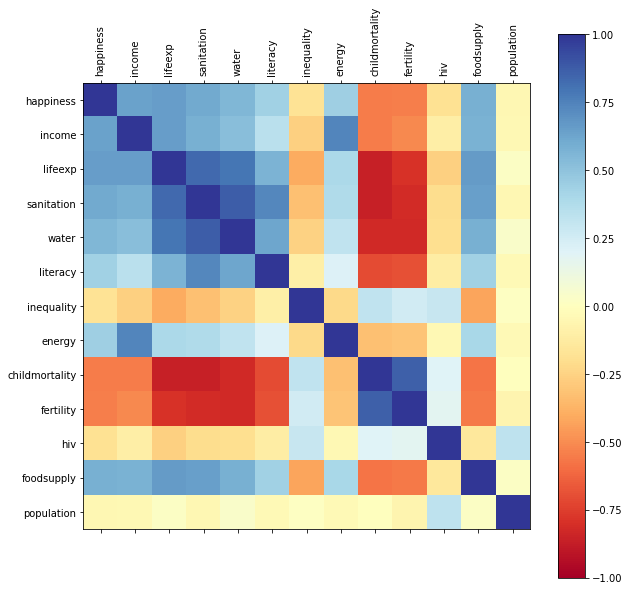

In [49]:
# Display a correlation matrix
correlationMatrix(dataset)

In [51]:
def appendEqualCountsClass(df, class_name, feature, num_bins, labels):
    '''Append a new class feature named 'class_name' based on a split of 'feature' into clases with equal sample points.  Class names are in 'labels'.'''

    # Compute the bin boundaries
    percentiles = np.linspace(0,100,num_bins+1)
    bins = np.percentile(df[feature],percentiles)

    # Split the data into bins
    n = pd.cut(df[feature], bins = bins, labels=labels, include_lowest=True)

    # Add the new binned feature to a copy of the data
    c = df.copy()
    c[class_name] = n
    return c    

In [52]:
# Bin lifexp into L, M and H bands
dataset = appendEqualCountsClass(dataset, "lifeexp_band", "lifeexp", 3, ["L","M","H"])

In [53]:
# Check how many rows in each bin
dataset.lifeexp_band.value_counts()

L    65
H    65
M    64
Name: lifeexp_band, dtype: int64

In [54]:
# Check the binning has worked as expected
dataset[['lifeexp','lifeexp_band']].head()

,lifeexp,lifeexp_band
0,57.9,L
1,77.6,H
2,76.5,H
3,75.4,M
4,82.6,H


In [55]:
dataset.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population', 'lifeexp_band'],
      dtype='object')

In [60]:
# Split into input and target features
y = dataset["lifeexp_band"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy',
             'childmortality', 'fertility',  'hiv', 'foodsupply', 'population']]


In [61]:
X.head()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,3.982855,1750.0,39.2,63.0,39.000000,38.579375,2183.725325,73.2,4.80,5800.000000,2090.0,33700000
1,4.606651,11000.0,97.7,91.4,96.800000,29.000000,808.000000,14.0,1.71,217991.677852,3190.0,2920000
2,6.697131,19100.0,94.8,99.6,97.900000,41.400000,2020.000000,11.6,2.31,95000.000000,3230.0,43400000
3,4.348320,8180.0,91.6,98.9,99.600000,32.400000,1020.000000,14.0,1.66,3600.000000,2930.0,2920000
4,7.309061,43800.0,100.0,100.0,81.573826,34.700000,5480.000000,3.8,1.86,22000.000000,3280.0,23800000


In [62]:
y.head()

0    L
1    H
2    H
3    M
4    H
Name: lifeexp_band, dtype: category
Categories (3, object): ['L' < 'M' < 'H']

In [63]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, columns=X.columns)

In [64]:
X.describe()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.140813,0.718449,0.830600,0.753331,0.473693,0.116950,0.216925,0.263789,0.038917,0.511086,0.027044
std,0.194528,0.159768,0.314995,0.217698,0.228323,0.156411,0.140854,0.231736,0.220853,0.098593,0.218624,0.101406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.022404,0.453562,0.726146,0.673025,0.375000,0.032539,0.044510,0.090909,0.001820,0.365079,0.001408
50%,0.549625,0.087345,0.869780,0.937423,0.753331,0.473693,0.083668,0.116469,0.194215,0.012489,0.511086,0.006017
75%,0.648486,0.196663,0.975248,0.991326,0.938086,0.551185,0.129928,0.348850,0.404545,0.038917,0.666667,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Build Models
BUild both decision trees and logistic regression models and see which one performs the best.

Split into test and training sets
Split the X and y sets into training and test sets.

In [65]:
# Split into test and training sets
test_size = 0.2
seed = 1
X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [66]:
# Build a decision tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [67]:
# Build a logistic regression model
model_lr = LogisticRegression(solver='lbfgs', multi_class='auto')
model_lr.fit(X_train, Y_train)

LogisticRegression()

Check the models
Run the training data through both models and see how it performs

In [68]:
# Check the model performance with the training data
predictions_dt = model_dt.predict(X_train)
print("DecisionTreeClassifier", accuracy_score(Y_train, predictions_dt))

DecisionTreeClassifier 1.0


In [71]:
# Check the model performance with the training data
predictions_lr = model_lr.predict(X_train)
print("LogisticRegression", accuracy_score(Y_train, predictions_lr))

LogisticRegression 0.8193548387096774


Evaluate the models
Now we evaluate the models by testing with the test set:

In [72]:
predictions_dt = model_dt.predict(X_test)
print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))

DecisionTreeClassifier 0.6410256410256411


In [73]:
predictions_lr = model_lr.predict(X_test)
print("LogisticRegression", accuracy_score(Y_test, predictions_lr))

LogisticRegression 0.6923076923076923


In [74]:
model = model_lr

In [88]:
import graphviz 

ModuleNotFoundError: No module named 'graphviz'

In [86]:
def viewDecisionTree(model, column_names):
    '''Visualise the decision tree'''

    dot_data = tree.export_graphviz(model, out_file=None,
            feature_names=column_names,
            class_names=model.classes_,
            filled=True, rounded=True,
            special_characters=True)
    graph = graphviz.Source(dot_data) 
    return graph  

In [87]:
viewDecisionTree(model_dt, X.columns)

NameError: name 'tree' is not defined

In [80]:
def decisionTreeSummary(model, column_names):
    '''Show a summary of the trained decision tree model'''

    # Plot the feature importances as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle('Decision tree feature importance', fontsize=16)
    rects = plt.barh(column_names, model.feature_importances_,color="khaki")

    # Annotate the bars with the feature importance values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(width, rect.get_y()),
                    xytext=(0,2),  
                    textcoords="offset points",  
                    ha='left', va='bottom')   

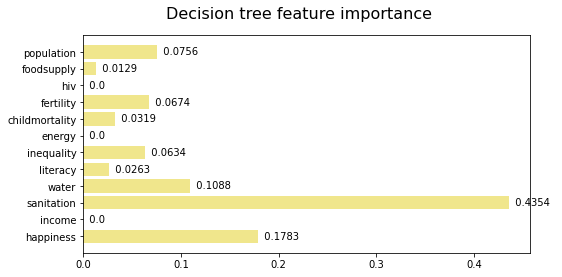

In [81]:
decisionTreeSummary(model_dt, X.columns)

In [82]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

In [83]:
model_lr.coef_

array([[ 1.71371091,  1.49722408,  1.27087553,  0.59605494,  0.08151421,
        -0.19455046,  0.37127391, -1.01763089, -0.83082851, -0.21858755,
         1.46283924, -0.25427835],
       [-1.14321387, -0.45304543, -1.85890281, -1.51035997, -0.65328426,
         0.45458793, -0.120908  ,  1.70983582,  1.01263768,  0.59282548,
        -0.55870809,  0.10694288],
       [-0.57049704, -1.04417865,  0.58802728,  0.91430503,  0.57177005,
        -0.26003747, -0.25036591, -0.69220493, -0.18180917, -0.37423793,
        -0.90413115,  0.14733547]])

In [84]:
def logisticRegressionSummary(model, column_names):
    '''Show a summary of the trained logistic regression model'''

    # Get a list of class names
    numclasses = len(model.classes_)
    if len(model.classes_)==2:
        classes =  [model.classes_[1]] # if we have 2 classes, sklearn only shows one set of coefficients
    else:
        classes = model.classes_

    # Create a plot for each class
    for i,c in enumerate(classes):
        # Plot the coefficients as bars
        fig = plt.figure(figsize=(8,len(column_names)/3))
        fig.suptitle('Logistic Regression Coefficients for Class ' + str(c), fontsize=16)
        rects = plt.barh(column_names, model.coef_[i],color="lightblue")
        
        # Annotate the bars with the coefficient values
        for rect in rects:
            width = round(rect.get_width(),4)
            plt.gca().annotate('  {}  '.format(width),
                        xy=(0, rect.get_y()),
                        xytext=(0,2),  
                        textcoords="offset points",  
                        ha='left' if width<0 else 'right', va='bottom')        
        plt.show()
        #for pair in zip(X.columns, model_lr.coef_[i]):
        #    print (pair)

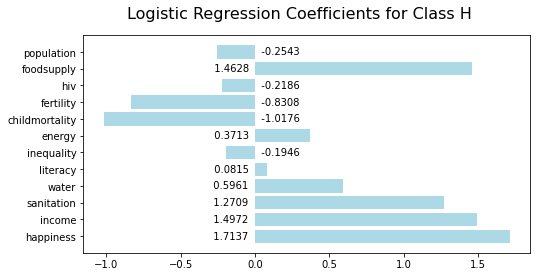

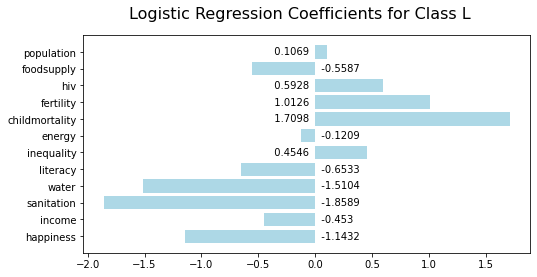

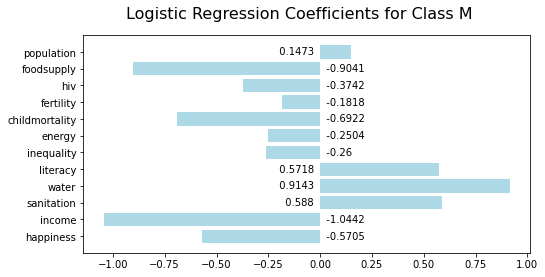

In [85]:
logisticRegressionSummary(model_lr, X.columns)